# basic libraries to work on the dataframe

In [1]:

import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

# Reading and Understanding Data

In [4]:
#Reading the data file using pandas
df = pd.read_csv('Leads[1].csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [5]:
# check the shape of the dataset
df.shape

(9240, 37)

In [6]:
# check statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [7]:
# check whether there are any duplicates
df.duplicated().sum()

0

In [8]:
#Lets have a look at all the columns, their datatypes and also get an idea of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

Rename column names

In [9]:
# change nomenclature to snakecase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [10]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


### Replace "Select" category with null values

In [15]:
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


There are 4 columns that contains `Select`, which are effectively null values. We are going to make that change 

In [16]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

### Handle null values and sales generated columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [17]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

#### Drop columns that have null values > 40% or Sales generated columns

In [18]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [19]:
# Lets look at what are we left with
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

#### `country` column

In [20]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [21]:
df.drop('country', axis = 1, inplace = True)

#### `course_selection_reason` column

In [22]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

In [23]:
df.drop('course_selection_reason', axis = 1, inplace = True)

#### `occupation` column

In [24]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

**Observation**
<br> For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias

In [25]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [26]:
df.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [27]:
# impute proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

#### `specialization` column

In [28]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**Observation**
<br> For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias

In [29]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [30]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [31]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

#### `city` column

In [32]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

**Observations**
We will categorize cities based on logical decisions and impute proportionately

In [33]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [34]:
df.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [35]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

### Handle categorical columns with low number of missing values and low representation of categories

In this step, we will go through the rest of the categorical columns one by one and
* Merge categories that have low representation
* Impute the missing values

In [37]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [38]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
<br> As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
* `lead_origin`
* `lead_source`

#### `lead_origin` column

In [39]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [40]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

#### `lead_source` column

In [41]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [42]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [43]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

### Handle Binary columns

* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

In [45]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns

In [48]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



**Observations**
<br> Because of heavy data imbalance, we can drop the following columns as well
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [49]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

### Handle Numerical columns

#### `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object

In [50]:
df.lead_number = df.lead_number.astype('object')

#### `total_visits` column

For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

In [51]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

#### `page_views_per_visit` column

Handle missing values

In [52]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


## Exploratory Data Analysis

### Numerical columns

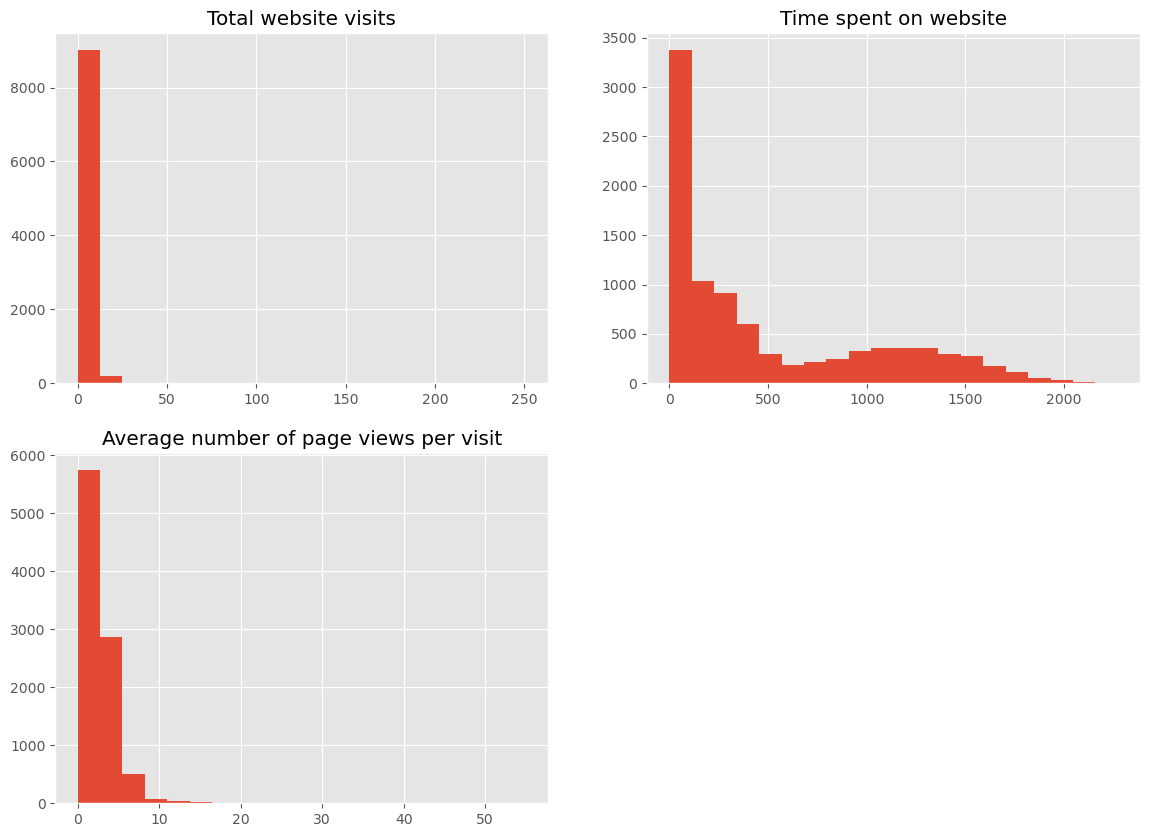

In [54]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**
- High peaks and skewed data. There might be a possibility of outliers. We will check them next

#### Heatmap

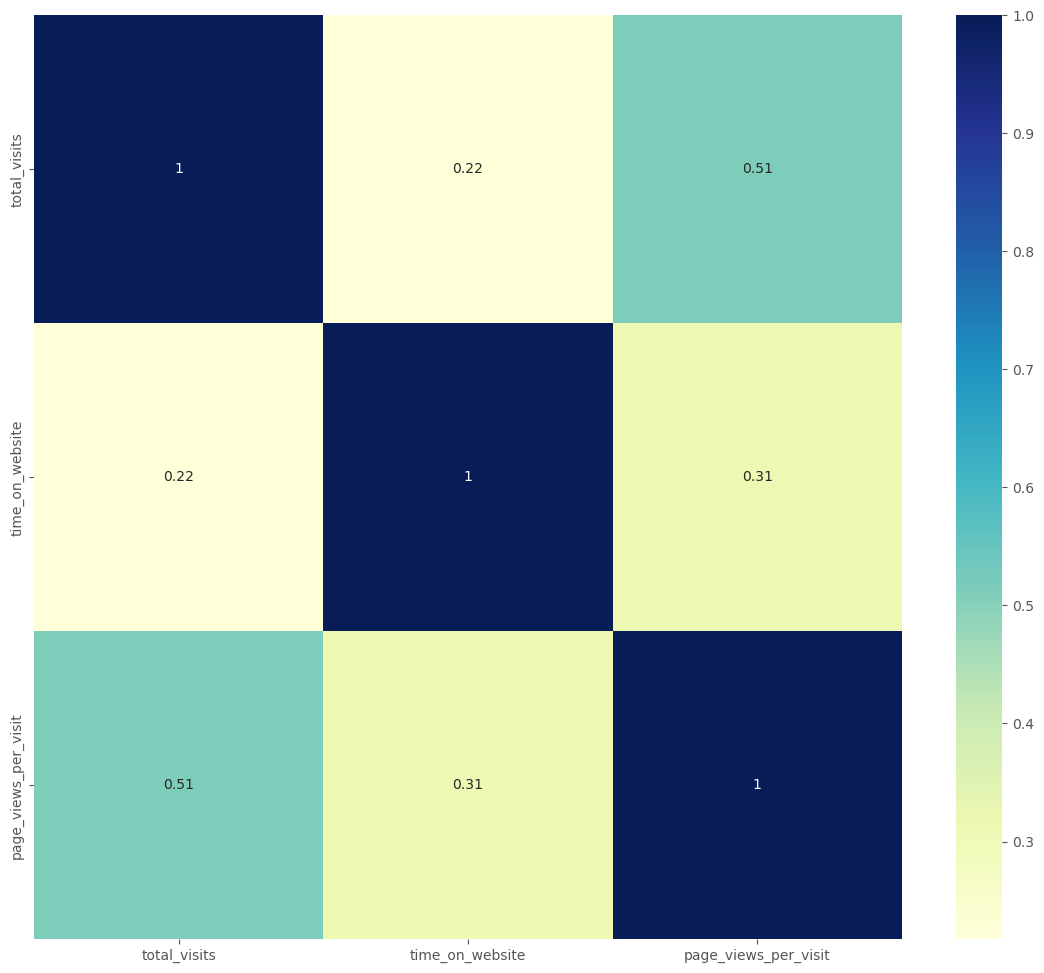

In [55]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**: No significaqnt correlation such that columns can be dropped

#### Check for outliers

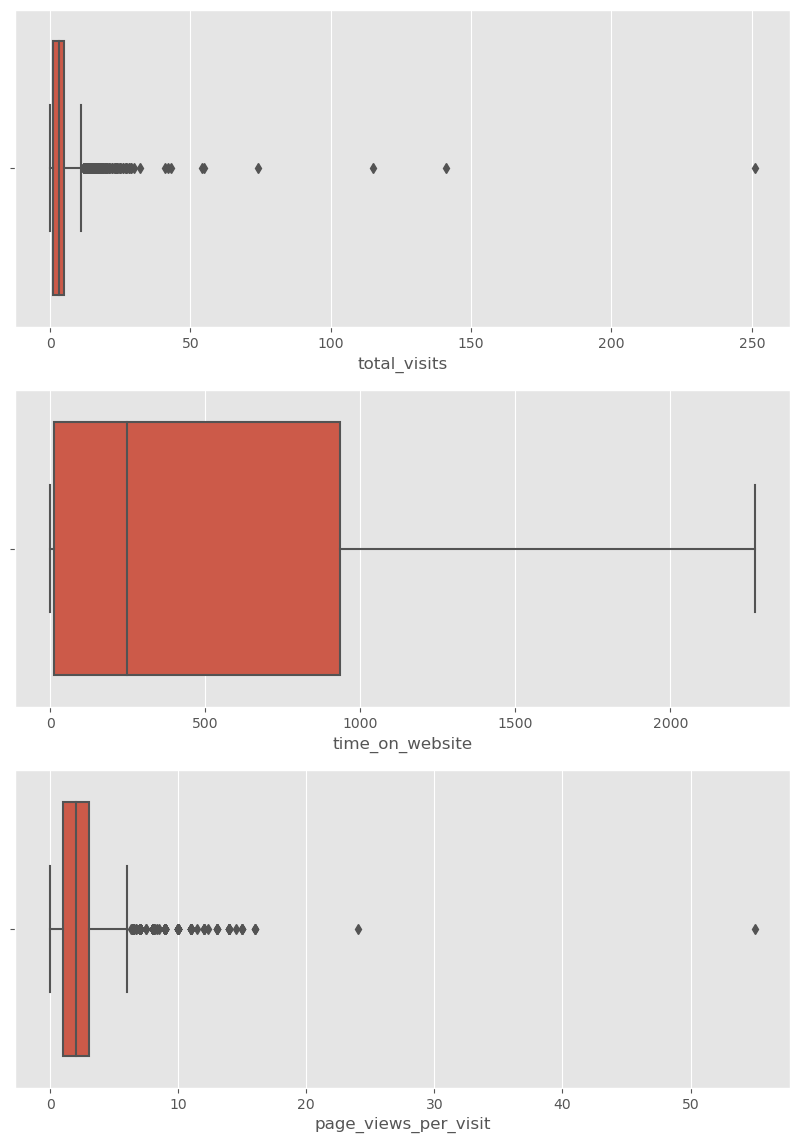

In [56]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

### Categorical columns

#### Lead Origin

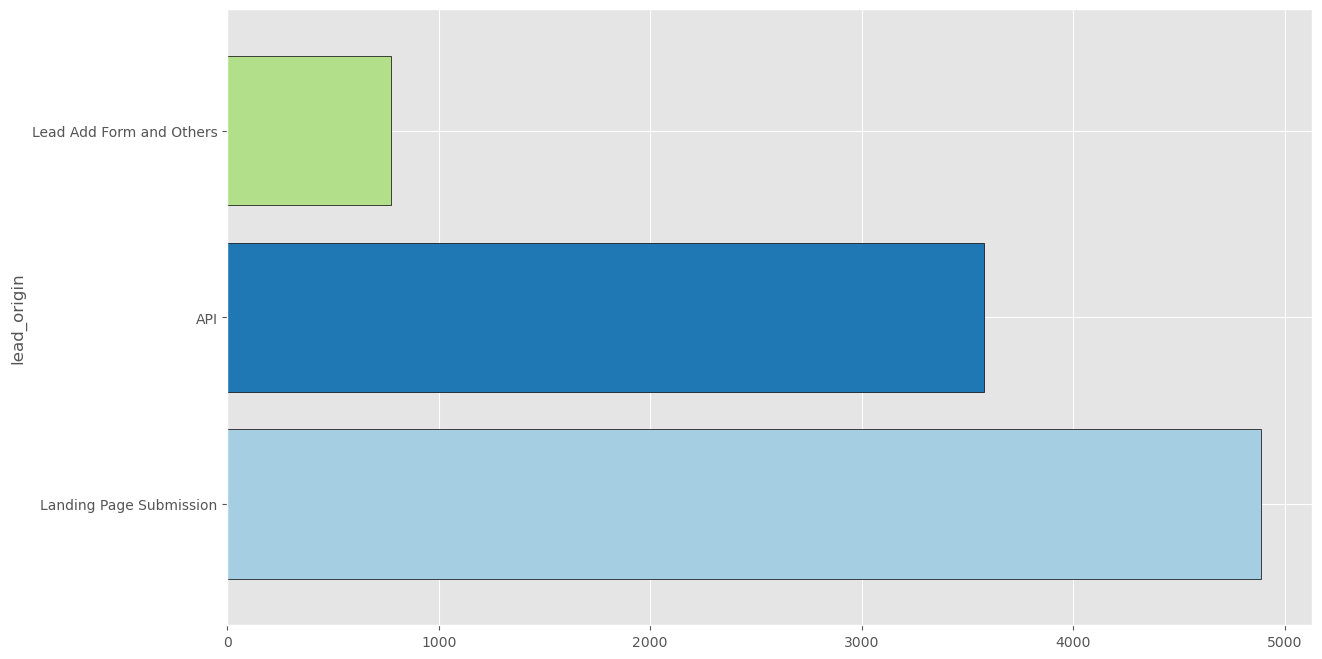

In [57]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [58]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,No


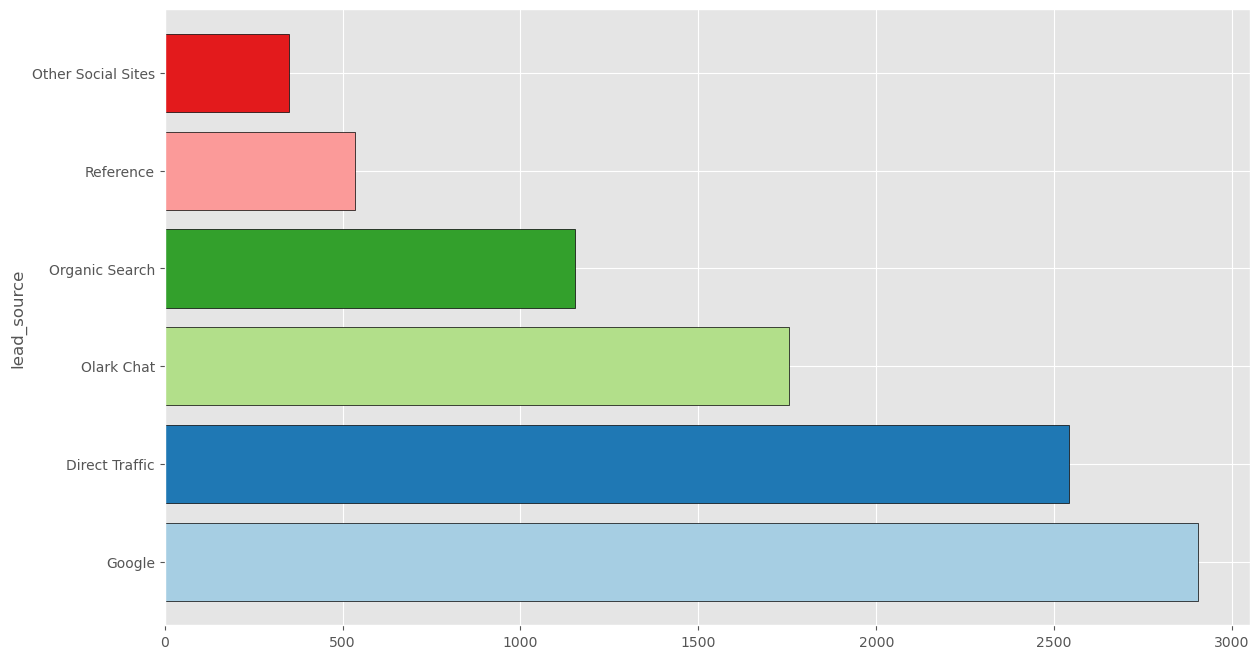

In [59]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

#### Specialization

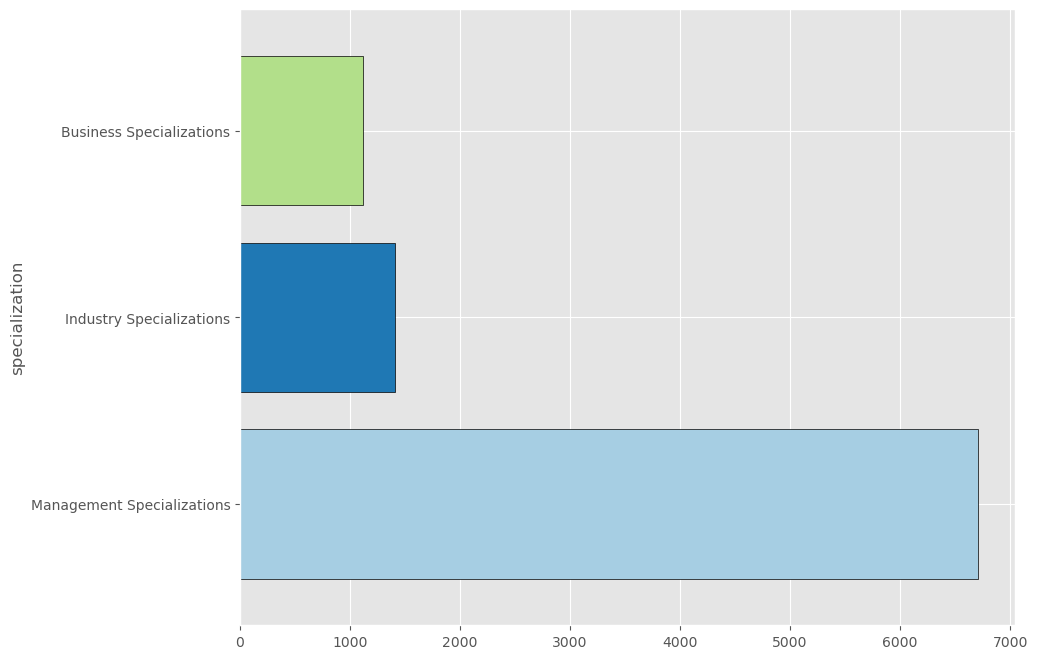

In [60]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Most of the speciliazation taken are management

#### Occupation

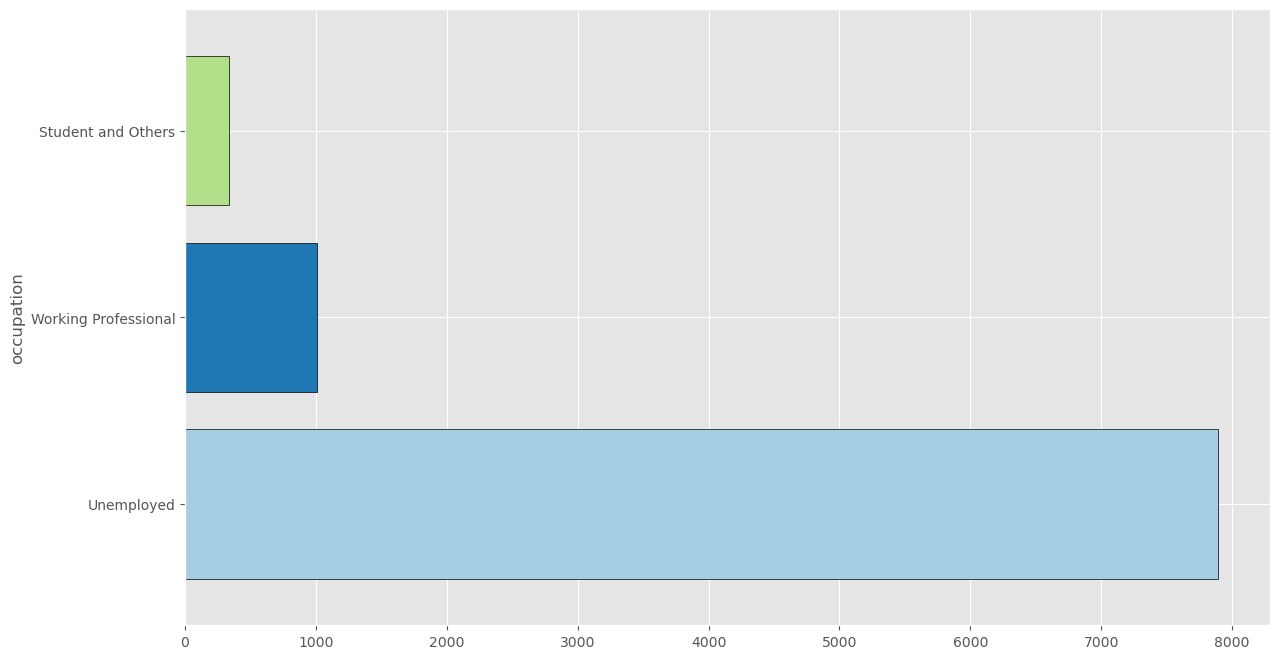

In [61]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Unempployed users are the most significant leads

#### City

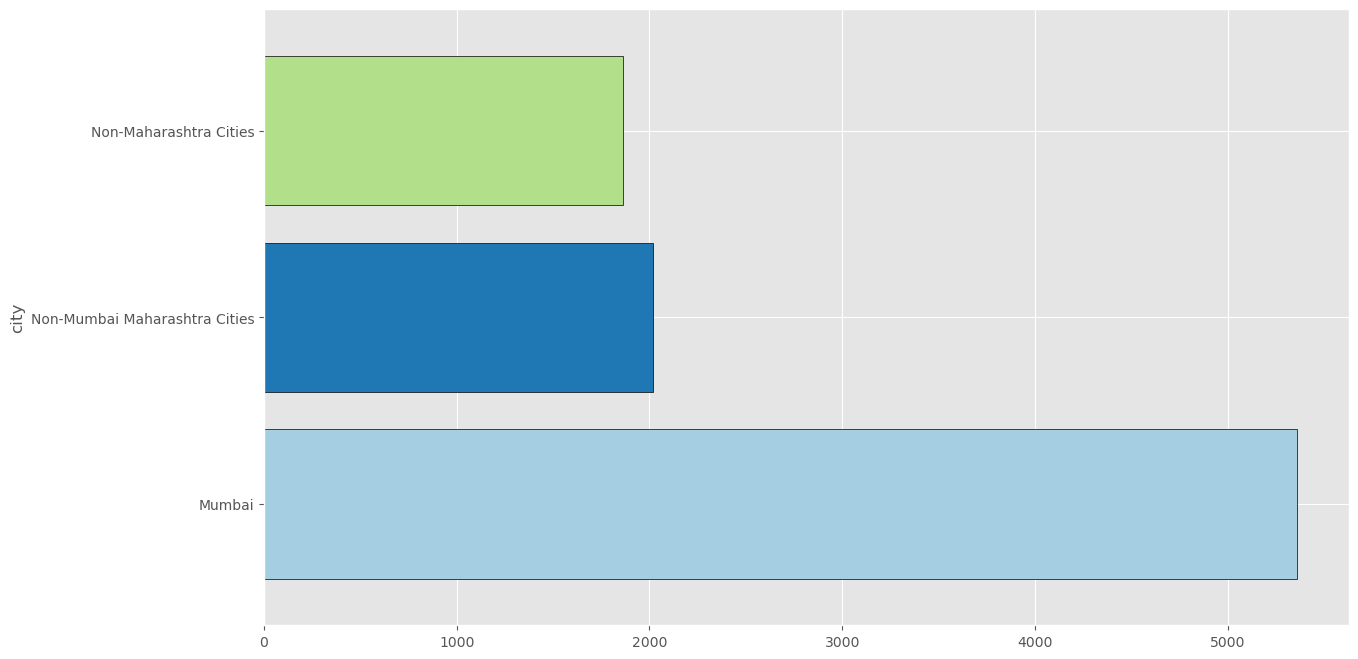

In [62]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Mumbai in particular and Maharashtra in general dominates the lead. This is likely due to the fact that the courses are based in Mumbai

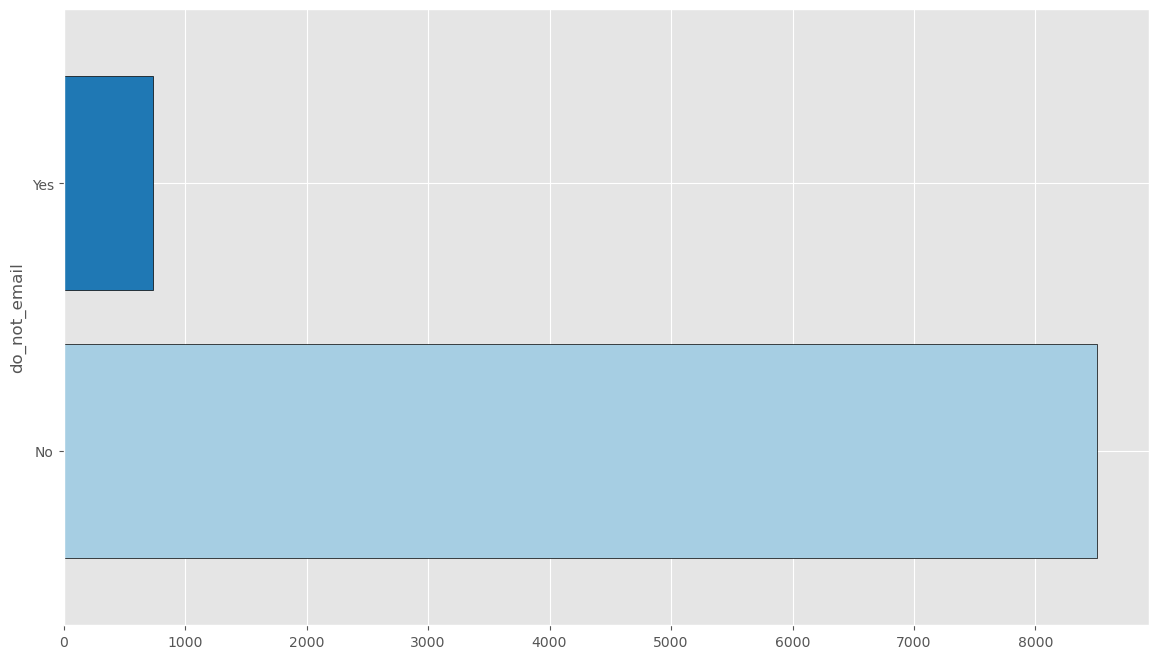

In [63]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

# Data Preparation

### Converting Binary (Yes/No) to 0/1

In [64]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [65]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.50,Industry Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


### Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [67]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [68]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [69]:
# capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

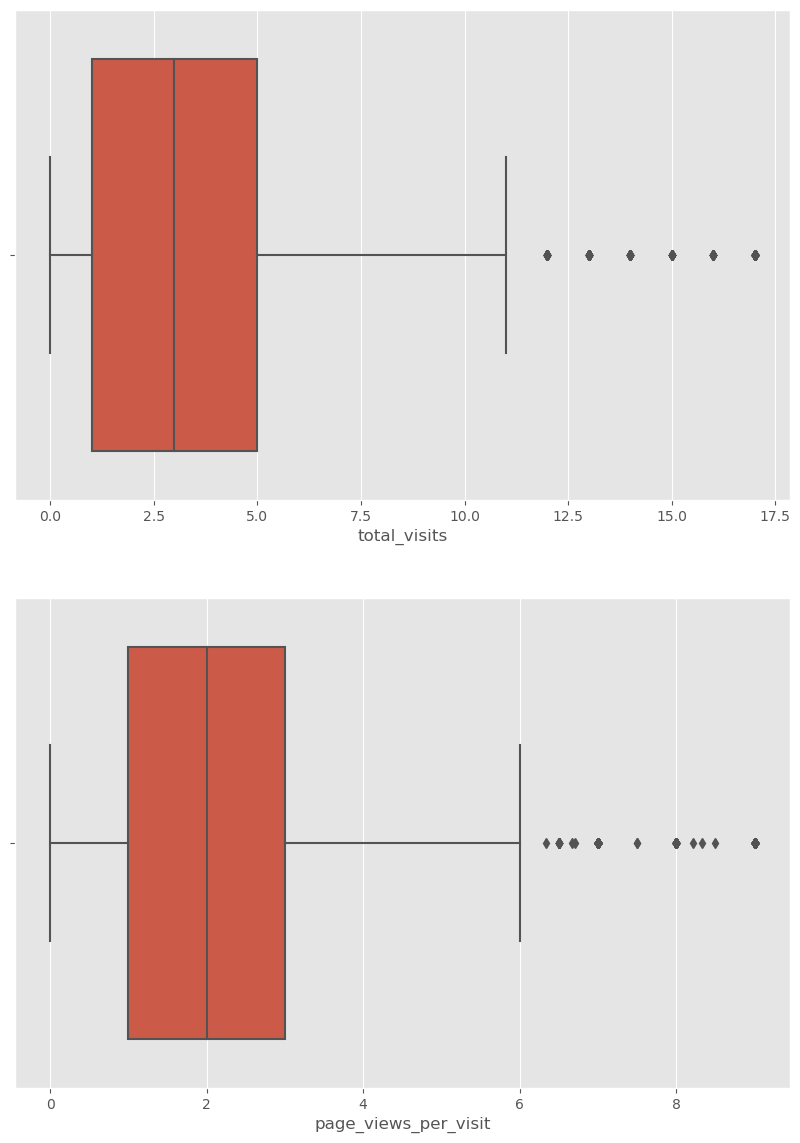

In [70]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

As we can see, we were able to significantly reduce the number of outliers by capping

### Test-Train Split

In [71]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [72]:
# Putting response variable to y
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [74]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.21,0.01,-0.50,1,1,0,0,0,0,0,0,0,1,1,0,1,0
3516,0,0.51,-0.69,0.09,0,0,0,0,1,0,0,0,0,0,1,0,0,1
8105,0,0.51,1.37,1.36,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [75]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

### Looking at correlations

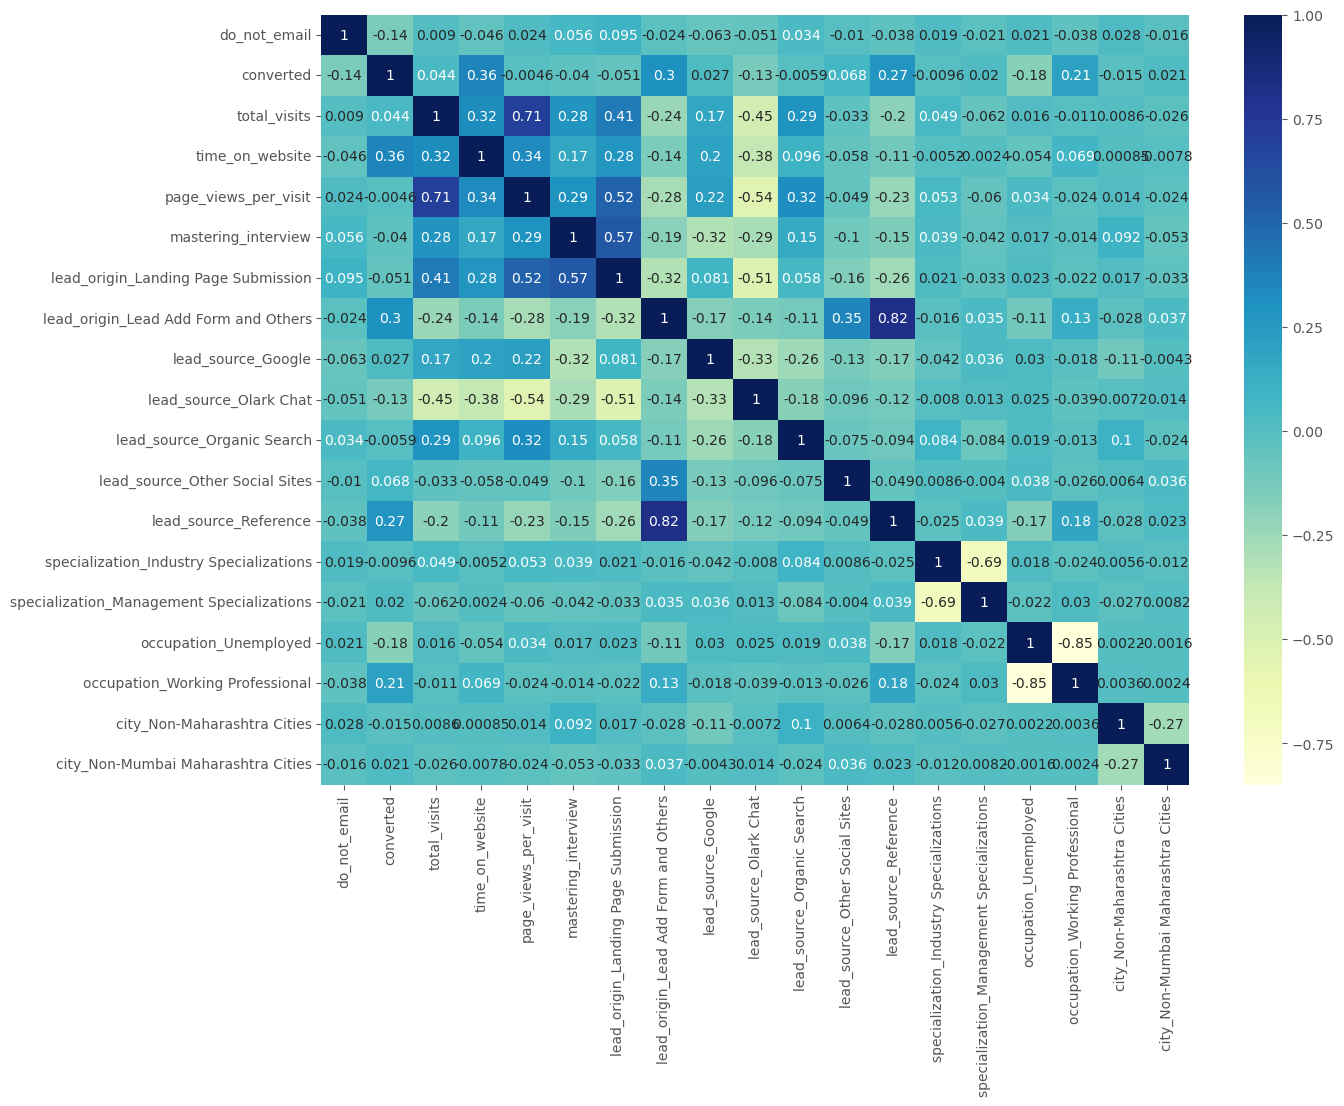

In [76]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### Drop highly correlated dummy variables

In [77]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

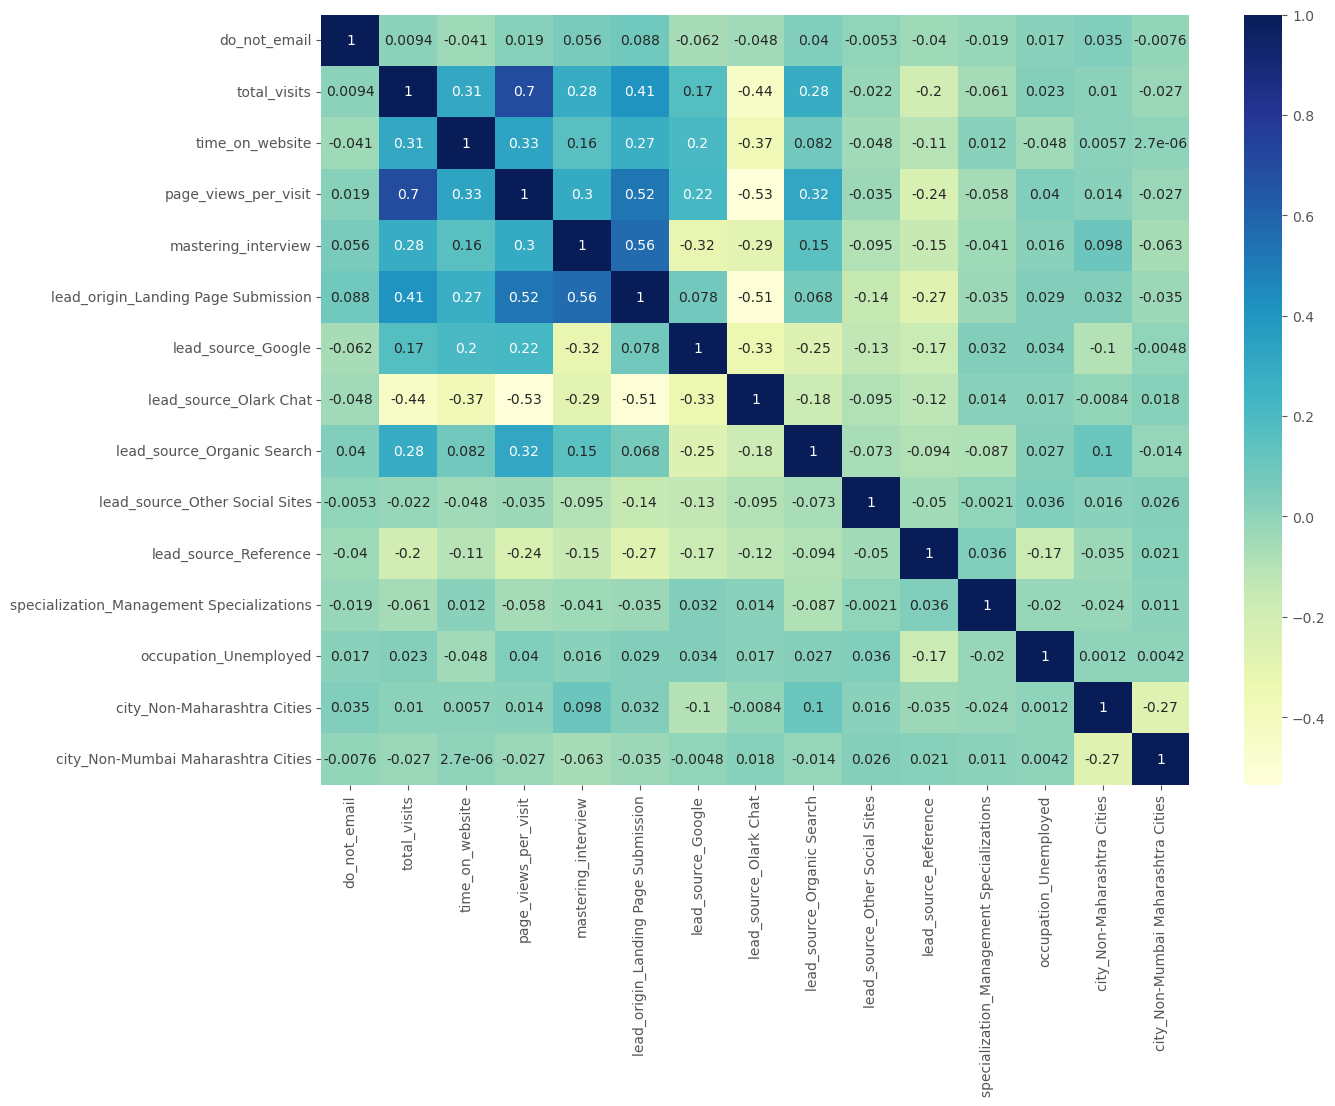

In [78]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

# Model Building

### Model 1: All variables

In [79]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3308.2
Date:                Wed, 11 Oct 2023   Deviance:                       6616.4
Time:                        13:22:42   Pearson chi2:                 6.64e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2639
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.3207      0.145     -2.205      0.027      -0.606      -0.036
do_not_email                                 -1.2277      0.144     -8.519      0.000      -1.510      -0.945
total_visits                                  0.1369      0.042      3.269      0.001       0.055       0.219
time_on_website                               1.0414      0.036     29.271      0.000       0.972       1.111
page_views_per_visit                         -0.1796      0.048     -3.715      0.000      -0.274      -0.085
mastering_interview                           0.0045      0.094      0.048      0.962      -0.180       0.188
lead_origin_Landing Page Submission          -0.0010      0.092     -0.011      0.992      -0.182       0.180
lead_source_Google                            0.3664      0.100      3.649      0.000       0.170       0.563
lead_source_Olark Chat                        0.6709      0.137      4.915      0.000       0.403       0.938
lead_source_Organic Search                    0.2315      0.116      2.000      0.046       0.005       0.458
lead_source_Other Social Sites                1.6128      0.175      9.205      0.000       1.269       1.956
lead_source_Reference                         3.9566      0.221     17.919      0.000       3.524       4.389
specialization_Management Specializations     0.0012      0.069      0.017      0.987      -0.134       0.136
occupation_Unemployed                        -0.8472      0.085     -9.926      0.000      -1.015      -0.680
city_Non-Maharashtra Cities                   0.0160      0.080      0.201      0.841      -0.140       0.172
city_Non-Mumbai Maharashtra Cities            0.0767      0.076      1.011      0.312      -0.072       0.225
=============================================================================================================
"""

### Feature selection using RFE

In [81]:
# Import the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initiate logistic regression
logreg = LogisticRegression()

# Initiate rfe
rfe = RFE(estimator=logreg, n_features_to_select=13)  # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)


In [82]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', False, 3),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', False, 2),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [84]:
# assign columns
col = X_train.columns[rfe.support_]

In [85]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['specialization_Management Specializations', 'city_Non-Maharashtra Cities'], dtype='object')

### Model 2: Assessing the model with statsmodel

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3308.2
Date:                Wed, 11 Oct 2023   Deviance:                       6616.5
Time:                        13:59:05   Pearson chi2:                 6.64e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2639
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.3157      0.134     -2.363      0.018      -0.577      -0.054
do_not_email                           -1.2271      0.144     -8.518      0.000      -1.509      -0.945
total_visits                            0.1367      0.042      3.266      0.001       0.055       0.219
time_on_website                         1.0415      0.036     29.287      0.000       0.972       1.111
page_views_per_visit                   -0.1797      0.048     -3.719      0.000      -0.274      -0.085
mastering_interview                     0.0052      0.094      0.055      0.956      -0.179       0.189
lead_origin_Landing Page Submission    -0.0010      0.092     -0.011      0.991      -0.182       0.180
lead_source_Google                      0.3653      0.100      3.643      0.000       0.169       0.562
lead_source_Olark Chat                  0.6704      0.136      4.913      0.000       0.403       0.938
lead_source_Organic Search              0.2330      0.115      2.021      0.043       0.007       0.459
lead_source_Other Social Sites          1.6132      0.175      9.209      0.000       1.270       1.957
lead_source_Reference                   3.9556      0.221     17.919      0.000       3.523       4.388
occupation_Unemployed                  -0.8473      0.085     -9.927      0.000      -1.015      -0.680
city_Non-Mumbai Maharashtra Cities      0.0727      0.073      0.994      0.320      -0.071       0.216
=======================================================================================================
"""

**Lets create empty lists of categorical columns and numerical columns, then we will review the columns one by one and see what needs to be done with each of them**

In [87]:
cat= []
num = []

In [88]:
#Creating a function to get the column details
def details(x):
    print(df[x].value_counts())
    print(df[x].isnull().sum(),'null values')
    print(df[x].isnull().sum()/df.count()['lead_number']*100,'% values are null')

# Do not email column
details('Do Not Email')

we'll leave this column as is for now, and add this to a new list of binary categorical variables

In [90]:
bi_cat = []
bi_cat.append('Do Not Email')

In [96]:
def cap(col,typ='right',value=0.95):
    if typ == 'left':
        df[df[col]<df[col].quantile(value)][col] = df[col].quantile(value)
    else:
        df[df[col]>df[col].quantile(value)][col] = df[col].quantile(value)
        

In [97]:
def num_details(x):
    print(df[x].value_counts())
    print(df[x].isnull().sum(),'null values')
    print(df[x].isnull().sum()/df.count()[x]*100,'% values are null')
    print('Percentiles are as follows')
    print(df[x].quantile([0.50,0.95,0.96,0.97,0.98,0.99]))
    sns.boxplot(df[x])

There are 27 percent null values in this column, and other values are mostly India, so this column would not be that useful,
we could create a binary column using this like 'India' if there weren't so many null values here. but considering the null values, lets drop this column

In [101]:
df.head(1)

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [104]:
import pandas as pd

# Assuming you have a CSV file named 'your_data.csv' containing your data
leads = pd.read_csv('leads[1].csv')

# Now you can check the value counts for the 'Do Not Call' column
value_counts = leads['Do Not Call'].value_counts(dropna=False)
print(value_counts)


No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [105]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [112]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Do Not Call', 'Do Not Call', 'Do Not Call', 'Do Not Call']

 IMBALANCED VARIABLES THAT CAN BE DROPPED

In [113]:
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [114]:
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [115]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [116]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [117]:
leads['Newspaper'].value_counts(dropna=False)


No     9239
Yes       1
Name: Newspaper, dtype: int64

In [118]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [119]:
leads['Through Recommendations'].value_counts(dropna=False)


No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [120]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [121]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [122]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [123]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [124]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [126]:
cols_to_drop.extend(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content', 'I agree to pay the amount through cheque'])


In [127]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [128]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

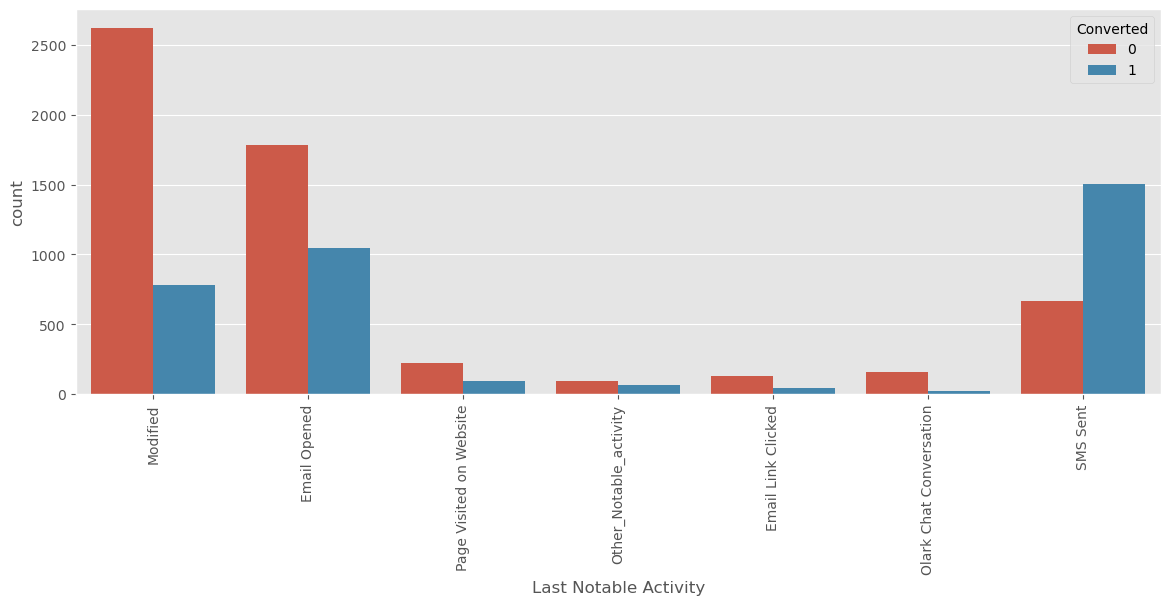

In [129]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [130]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [131]:
#list of columns to be dropped
cols_to_drop

['Do Not Call',
 'Do Not Call',
 'Do Not Call',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [132]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

# Numerical Attributes Analysis

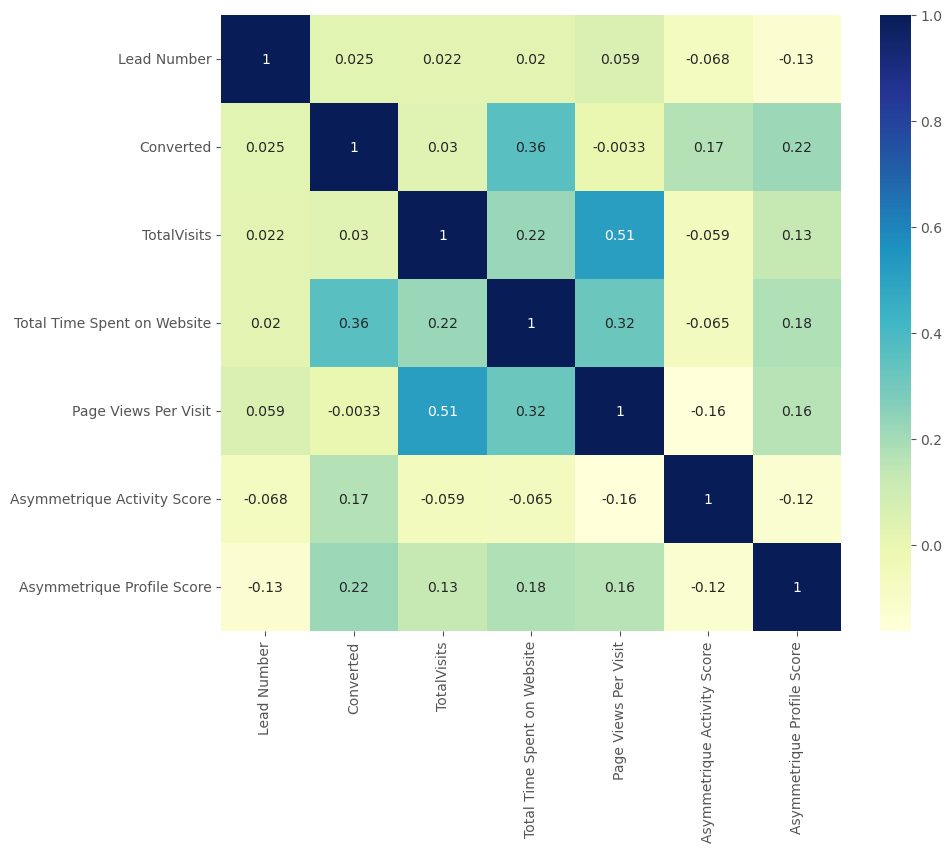

In [134]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()
    

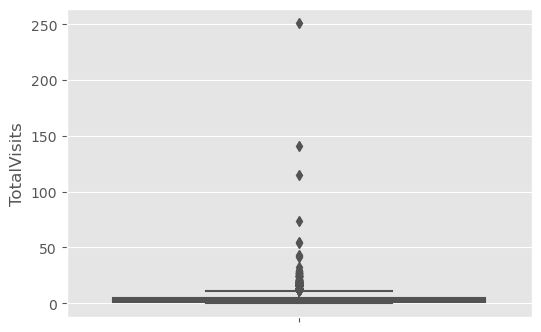

In [135]:

#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [136]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

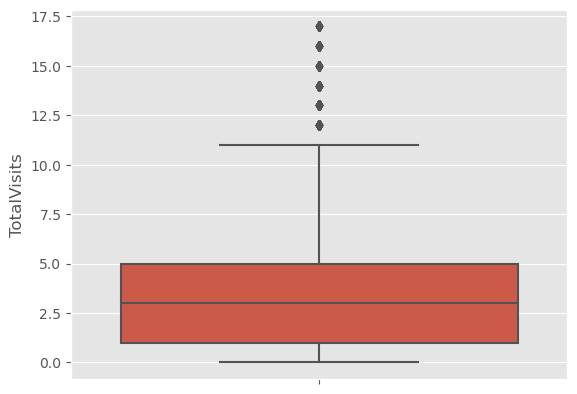

In [137]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [138]:
leads.shape

(9020, 25)

In [139]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.00
mean     479.76
std      544.69
min        0.00
5%         0.00
25%        7.00
50%      243.00
75%      915.25
90%     1371.00
95%     1554.05
99%     1836.62
max     2272.00
Name: Total Time Spent on Website, dtype: float64

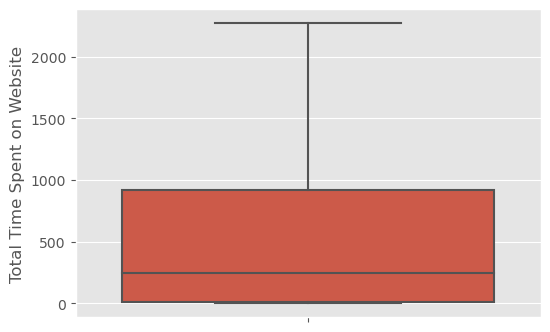

In [140]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [141]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count   9020.00
mean       2.34
std        2.06
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: Page Views Per Visit, dtype: float64

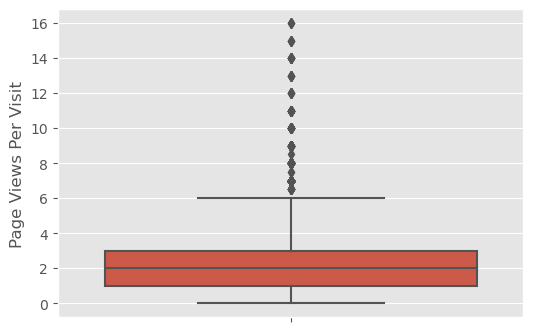

In [143]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

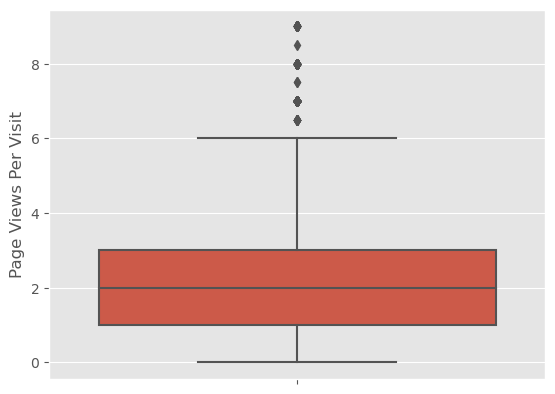

In [144]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


In [145]:
leads.shape

(8953, 25)

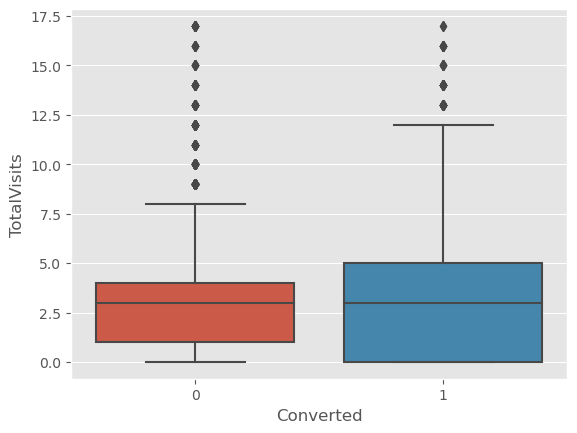

In [146]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference

Median for converted and not converted leads are the close.
Nothng conclusive can be said on the basis of Total Visits

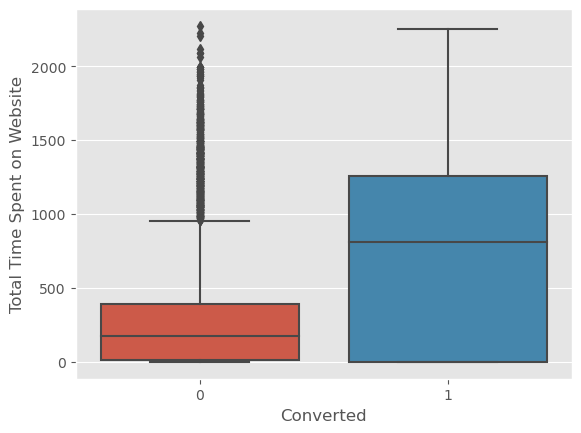

In [147]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference


Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

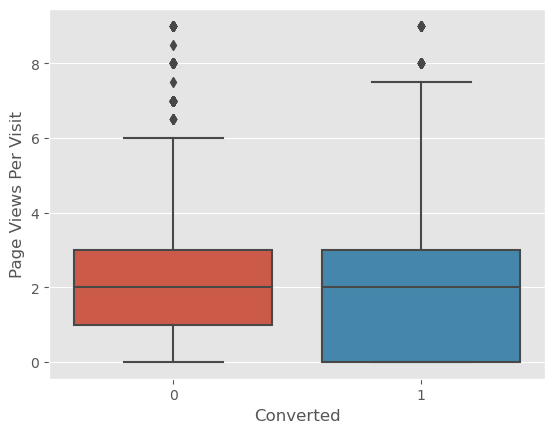

In [148]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

In [149]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.32
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                         25.95
Specialization                                  15.89
How did you hear about X Education              24.17
What is your current occupation                 29.52
What matters most to you in choosing a course   29.72
Tags                                            36.68
Lead Quality                                    52.06
Lead Profile                                    29.72
City                        

There are no missing values in the columns to be analyzed further

# Dummy Variable Creation

In [150]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [151]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [152]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [171]:
dummy = pd.get_dummies(leads['Specialization'], prefix='Specialization')
columns_to_drop = [col for col in dummy.columns if 'Specialization_' in col and leads['Specialization'].value_counts().get(col, 0) == 0]
dummy = dummy.drop(columns_to_drop, axis=1)
leads = pd.concat([leads, dummy], axis=1)


In [178]:
leads.drop(cat_cols,1,inplace = True)

In [179]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0.00,0,0.00,15.00,15.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,660728,0,5.00,674,2.50,15.00,15.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,660727,1,2.00,1532,2.00,14.00,20.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.00,305,1.00,13.00,17.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.00,1428,1.00,15.00,18.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Train-Test Split & Logistic Regression Model Building:

In [180]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [181]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   Asymmetrique Activity Score                           3378 non-null   float64
 5   Asymmetrique Profile Score                            3378 non-null   float64
 6   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 8   Lead Origin_Lead Import                               6

# Scaling of Data:

In [183]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
9196,-1.60,0.67,1.85,1.46,-0.22,1.48,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4696,-0.10,-0.03,-0.04,0.40,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3274,0.50,0.32,-0.64,-0.13,NaN,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2164,0.95,-0.38,-0.15,-0.13,-0.22,-0.73,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1667,1.12,0.32,1.26,-0.48,0.50,0.38,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Model Building using Stats Model & RFE:

In [184]:
import statsmodels.api as sm

In [207]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 9.3/9.3 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.7 MB/s eta 0:00:00


In [209]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy="mean")

# Fit and transform the imputer on X_train
X_train_imputed = imputer.fit_transform(X_train)

# Now, use X_train_imputed in RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train_imputed, y_train)


In [210]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False])

In [211]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 6),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', True, 1),
 ('City_Select', False, 3),
 ('City_Thane & Outskirts', True, 1),
 ('City_Tier II Cities', False, 2)]

In [212]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [213]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit', 'City_Select',
       'City_Tier II Cities'],
      dtype='object')

In [215]:
import numpy as np

# Check for infinite values
if np.isinf(X_train_sm).any().any():
    # Handle infinite values by replacing them with appropriate values
    X_train_sm[~np.isfinite(X_train_sm)] = np.nan

# Check for missing values
if np.isnan(X_train_sm).any().any():
    # Handle missing values using imputation (e.g., mean imputation)
    X_train_sm = np.nan_to_num(X_train_sm, nan=np.nanmean(X_train_sm))

# Now, you can proceed to build the model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.1
Date:                Wed, 11 Oct 2023   Deviance:                       5484.1
Time:                        16:35:51   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3647
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7180      0.085    -20.301      0.000      -1.884      -1.552
x1             1.0262      0.036     28.309      0.000       0.955       1.097
x2             0.7823      0.056     14.093      0.000       0.674       0.891
x3             0.5321      0.058      9.228      0.000       0.419       0.645
x4            -0.9205      0.091    -10.123      0.000      -1.099      -0.742
x5             3.5333      0.233     15.148      0.000       3.076       3.990
x6             1.0607      0.507      2.094      0.036       0.068       2.054
x7            23.9730    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
x8             0.6210      0.798      0.778      0.436      -0.942       2.184
x9             0.8499      0.230      3.703      0.000       0.400       1.300
x10            1.4178      0.086     16.531      0.000       1.250       1.586
x11            3.8449      0.202     19.025      0.000       3.449       4.241
x12            0.5465      0.132      4.152      0.000       0.289       0.805
x13            0.4046      0.163      2.482      0.013       0.085       0.724
x14            0.5623      0.172      3.276      0.001       0.226       0.899
x15            0.2965      0.123      2.402      0.016       0.055       0.538
==============================================================================
"""

In [217]:
# Check if 'Lead Source_Referral Sites' exists in the col object
if 'Lead Source_Referral Sites' in col:
    # If it exists, drop the column
    col = col.drop('Lead Source_Referral Sites', axis=1)
else:
    print("Column 'Lead Source_Referral Sites' not found in the col object.")

# Continue with your analysis or modeling


Column 'Lead Source_Referral Sites' not found in the col object.


In [226]:
print(X_train.shape)
print(y_train.shape)



(3378, 20)
(6267,)


In [227]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)



In [228]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [231]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [232]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.10
9,What is your current occupation_Unemployed,1.99
2,Asymmetrique Profile Score,1.68
4,Lead Origin_Lead Add Form,1.41
11,City_Other Cities,1.36
10,What is your current occupation_Working Profes...,1.21
13,City_Other Metro Cities,1.20
14,City_Thane & Outskirts,1.18
0,Total Time Spent on Website,1.14
12,City_Other Cities of Maharashtra,1.14


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [237]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.10
9,What is your current occupation_Unemployed,1.99
2,Asymmetrique Profile Score,1.68
4,Lead Origin_Lead Add Form,1.41
11,City_Other Cities,1.36
10,What is your current occupation_Working Profes...,1.21
13,City_Other Metro Cities,1.20
14,City_Thane & Outskirts,1.18
0,Total Time Spent on Website,1.14
12,City_Other Cities of Maharashtra,1.14


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [238]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.85
1   0.26
2   0.87
3   0.23
4   0.19
5   0.04
6   0.15
7   0.07
8   0.13
9   0.56
dtype: float64

In [239]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84500762, 0.26486668, 0.86752293, 0.23282775, 0.18531805,
       0.03626136, 0.14714757, 0.06848481, 0.13266221, 0.55759682])

In [246]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0.85,0.85,1
1,0.26,0.26,0
2,0.87,0.87,1
3,0.23,0.23,0
4,0.19,0.19,0


We need to determine the best cut-off value and the below section deals with that:

In [271]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.85,0.85,1,1,1,1,1,1,1,1,1,1,0
1,0.26,0.26,0,1,1,1,0,0,0,0,0,0,0
2,0.87,0.87,1,1,1,1,1,1,1,1,1,1,0
3,0.23,0.23,0,1,1,1,0,0,0,0,0,0,0
4,0.19,0.19,0,1,1,0,0,0,0,0,0,0,0


In [274]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0.85,0.85,1,1,1,1,1,1,1,1,1,1,0,1
1,0.26,0.26,0,1,1,1,0,0,0,0,0,0,0,0
2,0.87,0.87,1,1,1,1,1,1,1,1,1,1,0,1
3,0.23,0.23,0,1,1,1,0,0,0,0,0,0,0,0
4,0.19,0.19,0,1,1,0,0,0,0,0,0,0,0,0


In [276]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x * 100))

y_train_pred_final[['Converted', 'Converted_prob', 'final_Predicted', 'Lead_Score']].head()


,Converted,Converted_prob,final_Predicted,Lead_Score
0,0.85,0.85,1,85
1,0.26,0.26,0,26
2,0.87,0.87,1,87
3,0.23,0.23,0,23
4,0.19,0.19,0,19


In [292]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
7681,-1.10,0.58,-0.31,0.09,0.52,0.36,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,1.38,-0.09,-0.55,0.36,1.25,0.92,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8135,-1.24,-0.42,0.81,-0.17,-0.92,-0.21,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6915,-0.86,0.24,-0.63,-0.17,NaN,NaN,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2712,0.71,-0.09,-0.42,0.36,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [293]:
X_test = X_test[col]
X_test.head()


,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
7681,-0.31,0.52,0.36,1,0,0,0,0,0,1,0,0,0,0,1
984,-0.55,1.25,0.92,1,0,0,0,0,0,1,0,0,0,0,0
8135,0.81,-0.92,-0.21,1,0,0,0,0,0,0,0,1,0,0,0
6915,-0.63,NaN,NaN,1,0,0,0,0,0,1,0,0,0,1,0
2712,-0.42,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0


In [294]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON TEST SET

In [296]:
y_test_pred = res.predict(X_test_sm)

In [297]:
y_test_pred[:10]

7681   0.34
984    0.42
8135   0.11
6915    NaN
2712    NaN
244    0.23
4698    NaN
8287   0.18
6791    NaN
8970   0.30
dtype: float64

In [298]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [299]:
# Let's see the head
y_pred_1.head()

,0
7681,0.34
984,0.42
8135,0.11
6915,NaN
2712,NaN


In [300]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [301]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [302]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [303]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [304]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.34
1,0,984,0.42
2,0,8135,0.11
3,0,6915,NaN
4,1,2712,NaN


In [305]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [306]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.34
1,0,984,0.42
2,0,8135,0.11
3,0,6915,NaN
4,1,2712,NaN


In [308]:
# Replace NaN values with 0
y_pred_final['Converted_prob'].fillna(0, inplace=True)

# Round and convert 'Converted_prob' to integers
y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map(lambda x: round(x * 100))


In [309]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.34,34
1,984,0,0.42,42
2,8135,0,0.11,11
3,6915,0,0.00,0
4,2712,1,0.00,0


In [310]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [311]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.34,34,1
1,984,0,0.42,42,1
2,8135,0,0.11,11,0
3,6915,0,0.00,0,0
4,2712,1,0.00,0,0


In [312]:
 #Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7204020848845868

In [313]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1496,  180],
       [ 571,  439]], dtype=int64)

In [314]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [315]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.43465346534653465

In [316]:
# Let us calculate specificity
TN / float(TN+FP)

0.8926014319809069

In [318]:
from sklearn.metrics import precision_score

# Calculate precision score
precision = precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

# Now you can use the precision variable as needed


In [319]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.7092084006462036

In [321]:
from sklearn.metrics import recall_score

# Calculate recall score
recall = recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

# Now you can use the recall variable as needed


In [322]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.43465346534653465

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 72.40%
Sensitivity : 89.26%
Specificity : 70.92%

# Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 72.40%
Sensitivity : 89.26%
Specificity : 70.92%

Test Data: 

Accuracy : 72.48%
Sensitivity : 89.98%
Specificity : 70.86%